#### Why does dimensionality reduction matter?
1. Space efficiency
2. Computing efficiency
3. Visualization

We will compare 3 dimensionality reduction methods (PCA, T-SNE, and LDA)

In [1]:
import numpy as np
np.random.seed(1) #For debugging

# Create our dataset
We will use the sample mean and covarence to generate our first dataset

In [5]:
mu_vec1 = np.array([0, 0, 0]) #Sample mean (average)
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) #Sample covarence

#Multivariate normal Distribution / Gaussian Distribution are 3D matrix of values
#This is a 3 x 20 matrix. 3 Columns, 20 rows. 
#We use the mean to define the center point and covarence to
#define how far off the mean we can to deviate
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print (class1_sample)

[[-0.75439794 -0.29809284  1.13162939 -1.39649634  0.16003707 -2.02220122
   0.23009474 -0.20075807  0.19829972  0.37756379  1.19891788 -0.63873041
  -0.34385368  0.69803203  0.40349164  0.16938243 -0.26621851  0.31515939
   0.35054598 -1.61577235]
 [ 1.25286816  0.48851815  1.51981682 -1.44411381  0.87616892 -0.30620401
   0.76201118  0.18656139  0.11900865  0.12182127  0.18515642  0.42349435
   0.04359686 -0.44712856  0.59357852  0.74055645  0.03261455  0.84616065
  -1.31228341  1.12141771]
 [ 0.51292982 -0.07557171  2.18557541 -0.50446586  0.31563495  0.82797464
  -0.22232814  0.41005165 -0.67066229  1.12948391 -0.37528495  0.07734007
  -0.62000084  1.2245077  -1.09491185 -0.9537006  -1.37311732 -0.85951594
  -0.03869551  0.40890054]]


In [8]:
mu_vec2 = np.array([1, 1, 1]) #Sample mean (average)
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) #Sample covarence

#Multivariate normal Distribution / Gaussian Distribution are 3D matrix of values
#This is a 3 x 20 matrix. 3 Columns, 20 rows. 
#We use the mean to define the center point and covarence to
#define how far off the mean we can to deviate
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print (class2_sample)

[[ 9.75383044e-01  2.96710175e+00  2.62765075e+00  1.86334532e+00
  -2.30058136e-01  3.76469270e-01  1.80186103e+00  8.98254127e-01
   1.52946532e+00  1.61838026e+00  6.89883226e-01  3.18697965e+00
   8.63555256e-01 -1.22018729e-01  1.24879916e+00  8.25296840e-01
   3.19069973e+00  1.90148689e+00  1.04366899e+00  7.12692137e-01]
 [ 2.24838381e-01 -8.57981864e-01  1.33801170e+00  8.19079698e-01
   1.55053750e+00  1.52057634e+00  1.04656730e+00  1.86888616e+00
   1.13770121e+00  1.23249456e+00 -1.43483776e+00  1.44136444e+00
   8.80945812e-01  4.82905542e-01  7.03358848e-01  1.98633519e+00
  -8.96360923e-01  3.52832571e+00  7.73685757e-01  1.68006984e+00]
 [ 2.27375593e+00  2.23616403e+00 -1.99268032e-01  3.96079372e-01
   1.79280687e+00 -1.44341390e-01  8.13430228e-01  1.75041164e+00
   1.07782113e+00  1.68255141e+00  2.03882460e+00  8.99844767e-01
   1.01740941e+00  2.97317235e-03  1.49521132e+00  1.21353390e+00
   3.53083312e-01  7.51365222e-01  2.33145711e+00  6.80198401e-01]]


# Plot the data

Populating the interactive namespace from numpy and matplotlib


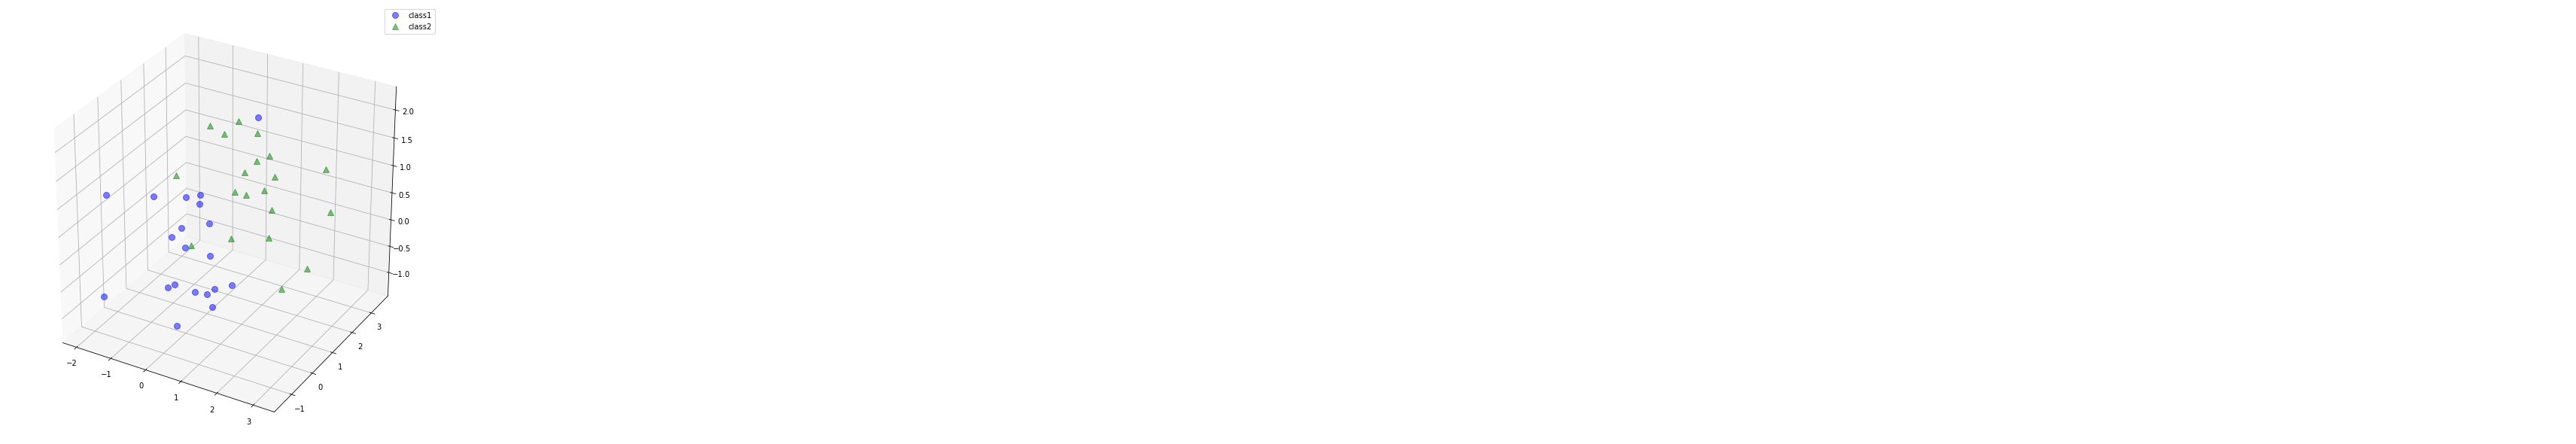

In [20]:
%pylab inline

#plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = Axes3D(fig)

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

# Merge data into one big dataset

In [26]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
#Doing this on 1 axis means that we will end up with an array of matrices
#with dimensions 3 x 40

In [27]:
all_samples

array([[-7.54397941e-01, -2.98092835e-01,  1.13162939e+00,
        -1.39649634e+00,  1.60037069e-01, -2.02220122e+00,
         2.30094735e-01, -2.00758069e-01,  1.98299720e-01,
         3.77563786e-01,  1.19891788e+00, -6.38730407e-01,
        -3.43853676e-01,  6.98032034e-01,  4.03491642e-01,
         1.69382433e-01, -2.66218506e-01,  3.15159392e-01,
         3.50545979e-01, -1.61577235e+00,  9.75383044e-01,
         2.96710175e+00,  2.62765075e+00,  1.86334532e+00,
        -2.30058136e-01,  3.76469270e-01,  1.80186103e+00,
         8.98254127e-01,  1.52946532e+00,  1.61838026e+00,
         6.89883226e-01,  3.18697965e+00,  8.63555256e-01,
        -1.22018729e-01,  1.24879916e+00,  8.25296840e-01,
         3.19069973e+00,  1.90148689e+00,  1.04366899e+00,
         7.12692137e-01],
       [ 1.25286816e+00,  4.88518147e-01,  1.51981682e+00,
        -1.44411381e+00,  8.76168921e-01, -3.06204013e-01,
         7.62011180e-01,  1.86561391e-01,  1.19008646e-01,
         1.21821271e-01,  1.85

In [28]:
all_samples.T

array([[-7.54397941e-01,  1.25286816e+00,  5.12929820e-01],
       [-2.98092835e-01,  4.88518147e-01, -7.55717130e-02],
       [ 1.13162939e+00,  1.51981682e+00,  2.18557541e+00],
       [-1.39649634e+00, -1.44411381e+00, -5.04465863e-01],
       [ 1.60037069e-01,  8.76168921e-01,  3.15634947e-01],
       [-2.02220122e+00, -3.06204013e-01,  8.27974643e-01],
       [ 2.30094735e-01,  7.62011180e-01, -2.22328143e-01],
       [-2.00758069e-01,  1.86561391e-01,  4.10051647e-01],
       [ 1.98299720e-01,  1.19008646e-01, -6.70662286e-01],
       [ 3.77563786e-01,  1.21821271e-01,  1.12948391e+00],
       [ 1.19891788e+00,  1.85156417e-01, -3.75284950e-01],
       [-6.38730407e-01,  4.23494354e-01,  7.73400683e-02],
       [-3.43853676e-01,  4.35968568e-02, -6.20000844e-01],
       [ 6.98032034e-01, -4.47128565e-01,  1.22450770e+00],
       [ 4.03491642e-01,  5.93578523e-01, -1.09491185e+00],
       [ 1.69382433e-01,  7.40556451e-01, -9.53700602e-01],
       [-2.66218506e-01,  3.26145467e-02

# Compute the dimensional mean vector, it will help compute the covariance matrix

In [31]:
#Mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3D Mean Vector
mean_vector = np.array(([[mean_x], [mean_y], [mean_z]]))
mean_vector

array([[0.64163822],
       [0.62075309],
       [0.5691864 ]])

# Compute the covariance matrix
The covariance matrix models the relationship between our variables. The variance is the degree by which a random variable changes with respect to its expected value.

Covariance is the degree by which two different random variable change with respect to each other. Measures relationship between each feature

In [32]:
#Compute covariance matrix
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.42878673 0.21958437 0.40079966]
 [0.21958437 0.99831476 0.12632412]
 [0.40079966 0.12632412 1.01587488]]


# Compute eigenvectors and eigenvalues
Eigenvalues/vectors are instrumental to understanding electrical circuits, mechanical systems, ecology and even Google's PageRank algorithm. Eigenvectors make understanding linear transformations easy.
They are the "axes" (directions) along which a linear transformation acts simply by "stretching/compressing" and/or "flipping".
Eigenvalues give you the factors by which this compression occurs.
There are a lot of problems that can be modeled with linear transformations, and the eigenvectors give very simply solution.
The more directions you have along which you understand the behavior of a linear transformation, the easier it is to understand the linear transformation; so you want to have as many linearly independent eigenvectors as possible associated 
to a single linear transformation.

In [35]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

for i in range(len(eig_val)):
    eigvec_sc = eig_vec[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val[i]))

Eigenvector 1: 
[[-0.81100975]
 [-0.31639546]
 [-0.4920946 ]]
Eigenvalue 1 from scatter matrix: 1.7576444786339478
Eigenvector 2: 
[[-0.53005318]
 [ 0.04139469]
 [ 0.84695343]]
Eigenvalue 2 from scatter matrix: 0.7712144563639587
Eigenvector 3: 
[[ 0.24760212]
 [-0.94772379]
 [ 0.20127792]]
Eigenvalue 3 from scatter matrix: 0.9141174287508649


# Create eigenpairs from both of them and sort them by decreasing value

In [36]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
             for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.7576444786339478
0.9141174287508649
0.7712144563639587


# Choose k eigenvectors w largest eigenvalues to form d x k matrix

In [37]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                     eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.81100975  0.24760212]
 [-0.31639546 -0.94772379]
 [-0.4920946   0.20127792]]


# Using the d x k matrix to transform our data

In [39]:
transformed = matrix_w.T.dot(all_samples)
transformed #This is now 2D data instead of 3D

array([[-0.03698771,  0.1243797 , -2.47413546,  1.83772813, -0.56232975,
         1.32946462, -0.31829948, -0.09799463,  0.13155248, -0.90056454,
        -0.84624105,  0.34596627,  0.5701739 , -1.02721496,  0.02375899,
         0.09763141,  0.88129032, -0.10035558,  0.14994616,  0.75437792,
        -1.98108601, -3.23529112, -2.4563325 , -1.96525284, -1.18623421,
        -0.71539409, -2.19274064, -2.18116807, -2.13076475, -2.53045232,
        -1.10882043, -3.48352149, -1.47974067, -0.05529383, -1.97111326,
        -1.89496471, -2.47783446, -3.02821343, -2.23851384, -1.44428871],
       [-1.27092204, -0.55199961, -0.72026465,  0.92130772, -0.72721027,
        -0.04385146, -0.70995393, -0.14398245, -0.1986774 ,  0.20537285,
         0.04584089, -0.54393983, -0.25124916,  0.84305495, -0.68302468,
        -0.85186239, -0.37320405, -0.89689403,  1.32268959, -1.38056025,
         0.48607909,  1.99788095, -0.65756188, -0.23517104, -1.16559172,
        -1.37692452, -0.38198658, -1.19645904, -0.

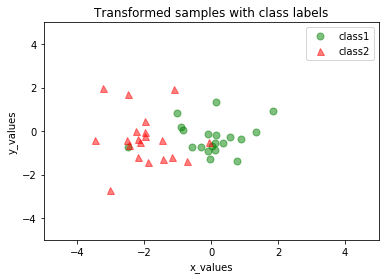

In [40]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Compairson of PCA vs T-SNE vs LDA

- Best Generic DR Method **PCA** (generally for unsupervised)
- Best for Supervised **LDA (Linear discriminant analysis)**
- Best Visualizations **T-SNE**

**T-SNE**
1. - Compute similarity matrix between all feature vectors
2. - Compute similarity matrix from map points
3. - Use gradient descent to minimimze distance between matrices